# Visualizing With The COVID Tracking Project's API 

Playing around with the api from the wonderful folks at https://covidtracking.com/api/

In [48]:
import pandas as pd 
import requests 
import seaborn as sns;sns.set()
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
import io
from datetime import datetime
from utils import *

In [244]:
us_daily = pd.DataFrame.from_dict(requests.get('https://covidtracking.com/api/us/daily').json())
states = pd.DataFrame.from_dict(requests.get('https://covidtracking.com/api/states').json())
states_daily = pd.DataFrame.from_dict(requests.get('https://covidtracking.com/api/states/daily').json())

In [272]:
import requests 
from datetime import datetime
today_response = requests.get(F"""https://covidtracking.com/api/states/daily?date={int(datetime.today().strftime('%Y%m%d'))-1}""")
today_json = today_response.json()

pd.DataFrame.from_dict(today_json)


,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200325,AK,42,1649.0,NaN,1.0,1.0,1691,2020-03-25T20:00:00Z,1691,1,1,663,6,669
1,20200325,AL,283,2529.0,NaN,NaN,0.0,2812,2020-03-25T20:00:00Z,2812,0,0,423,68,491
2,20200325,AR,280,1437.0,0.0,22.0,2.0,1717,2020-03-25T20:00:00Z,1717,2,0,490,62,552
3,20200325,AS,0,NaN,NaN,NaN,0.0,0,2020-03-25T20:00:00Z,0,0,0,0,0,0
4,20200325,AZ,450,323.0,53.0,8.0,6.0,826,2020-03-25T20:00:00Z,773,1,0,10,93,103
5,20200325,CA,2102,13452.0,12100.0,NaN,40.0,27654,2020-03-25T20:00:00Z,15554,0,0,0,0,0
6,20200325,CO,912,6789.0,NaN,84.0,11.0,7701,2020-03-25T20:00:00Z,7701,4,12,1285,192,1477
7,20200325,CT,875,5023.0,NaN,113.0,19.0,5898,2020-03-25T20:00:00Z,5898,7,42,341,257,598
8,20200325,DC,183,1423.0,3.0,NaN,2.0,1609,2020-03-25T20:00:00Z,1606,0,0,228,46,274
9,20200325,DE,115,36.0,NaN,11.0,0.0,151,2020-03-25T20:00:00Z,151,0,11,0,24,24


In [257]:
us_daily = pd.DataFrame.from_dict(requests.get('https://covidtracking.com/api/us/daily').json())
us_daily = us_daily[us_daily['date'] == int(datetime.datetime.today().strftime('%Y%m%d'))-1]
us_daily

,date,states,positive,negative,posNeg,pending,hospitalized,death,total
1,20200322,56,31888,193463,225351,2842,2554.0,398.0,228216


In [246]:
print(F"us_daily = {list(us_daily)}\n states = {list(states)}\n states_daily = {list(states_daily)}")

us_daily = ['date', 'states', 'positive', 'negative', 'posNeg', 'pending', 'hospitalized', 'death', 'total']
 states = ['state', 'positive', 'positiveScore', 'negativeScore', 'negativeRegularScore', 'commercialScore', 'grade', 'score', 'negative', 'pending', 'hospitalized', 'death', 'total', 'lastUpdateEt', 'checkTimeEt', 'dateModified', 'dateChecked']
 states_daily = ['date', 'state', 'positive', 'negative', 'pending', 'hospitalized', 'death', 'total', 'dateChecked']


# US daily data

In [190]:
response = requests.get('https://covidtracking.com/api/us/daily')
response_json = response.json() 
us = pd.DataFrame.from_dict(response_json)
us['datetime'] = us.date.astype(str).apply(lambda x: datetime.strptime(x,'%Y%m%d'))
us.date = us.date.astype(str).apply(lambda x: x.replace('2020',''))
us['pos_diff'] = us.positive.diff()

In [191]:
us

,date,states,positive,negative,posNeg,pending,death,total,datetime,pos_diff
0,0304,14,118,748,866,103,NaN,969,2020-03-04,NaN
1,0305,24,176,953,1129,197,NaN,1326,2020-03-05,58.0
2,0306,36,223,1571,1794,458,NaN,2252,2020-03-06,47.0
3,0307,51,341,1809,2150,602,NaN,2752,2020-03-07,118.0
4,0308,51,417,2335,2752,347,NaN,3099,2020-03-08,76.0
5,0309,51,584,3367,3951,313,NaN,4264,2020-03-09,167.0
6,0310,51,778,3807,4585,469,NaN,5054,2020-03-10,194.0
7,0311,51,1053,5978,7031,563,27.0,7617,2020-03-11,275.0
8,0312,51,1315,7949,9264,673,36.0,9966,2020-03-12,262.0
9,0313,51,1922,13613,15535,1130,39.0,16665,2020-03-13,607.0


Plotting New Cases and Total Cases Reported Over Time

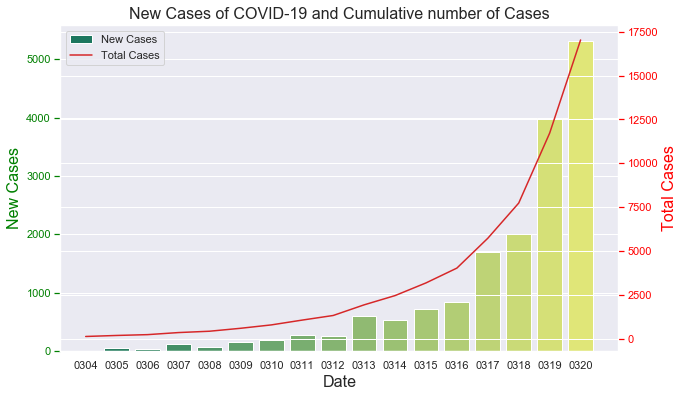

In [213]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
#bar plot creation
ax1.set_title('New Cases of COVID-19 and Cumulative Number of Cases', fontsize=16)
ax1 = sns.barplot(x='date', y='pos_diff', data = us, palette='summer', label = 'New Cases')

# #specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.lineplot(x='date', y='positive', data = us, color=color,sort=False, label = 'Total Cases')
ax2.get_legend().remove()
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax2.transAxes)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('New Cases', fontsize=16)
_ = ax2.set_ylabel('Total Cases', fontsize=16)

ax1.tick_params(axis='y', colors='green')
ax1.yaxis.label.set_color('green')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
hide_toggle()

---

# Supporting The Conclusion that Positive Cases are a proxy for the number of tests conducted 

To interpret this, we can see that the numbrer of positive test results is *highly* correlated with the total number of tests conducted in that state

In [193]:
response = requests.get('https://covidtracking.com/api/states')
response_json = response.json() 
to_date_data = pd.DataFrame.from_dict(response_json)

corr = to_date_data[['positive','negative','pending','death','total']].corr()
corr

,positive,negative,pending,death,total
positive,1.000000,0.885393,0.283746,0.556000,0.924620
negative,0.885393,1.000000,0.761826,0.812857,0.995146
pending,0.283746,0.761826,1.000000,0.628638,0.809012
death,0.556000,0.812857,0.628638,1.000000,0.777743
total,0.924620,0.995146,0.809012,0.777743,1.000000


In [218]:
to_date_data.sort_values("positive", ascending = False)[['state','positive','total','positive_ratio']].iloc[:10]

,state,positive,total,positive_ratio
34,NY,10356.0,45437,0.227920
47,WA,1524.0,23243,0.065568
4,CA,1241.0,11722,0.105869
31,NJ,890.0,1240,0.717742
9,FL,658.0,8239,0.079864
14,IL,590.0,4286,0.137657
18,LA,585.0,2765,0.211573
22,MI,549.0,2618,0.209702
10,GA,420.0,2386,0.176027
19,MA,413.0,4132,0.099952


In [217]:
to_date_data.sort_values("total", ascending = False)[['state','positive','total','positive_ratio']].iloc[:10]

,state,positive,total,positive_ratio
34,NY,10356.0,45437,0.227920
47,WA,1524.0,23243,0.065568
4,CA,1241.0,11722,0.105869
9,FL,658.0,8239,0.079864
43,TX,194.0,5277,0.036763
27,NC,184.0,5276,0.034875
14,IL,590.0,4286,0.137657
38,PA,371.0,4137,0.089679
19,MA,413.0,4132,0.099952
23,MN,138.0,4090,0.033741


In [216]:
to_date_data['positive_ratio'] = to_date_data['positive']/to_date_data['total']
to_date_data.sort_values("positive_ratio", ascending = False)[['state','positive','total','positive_ratio']].iloc[:10]


,state,positive,total,positive_ratio
55,VI,6.0,6,1.000000
1,AL,124.0,152,0.815789
31,NJ,890.0,1240,0.717742
20,MD,190.0,284,0.669014
35,OH,169.0,309,0.546926
8,DE,40.0,76,0.526316
34,NY,10356.0,45437,0.227920
11,HI,37.0,170,0.217647
18,LA,585.0,2765,0.211573
22,MI,549.0,2618,0.209702


Visualizing this

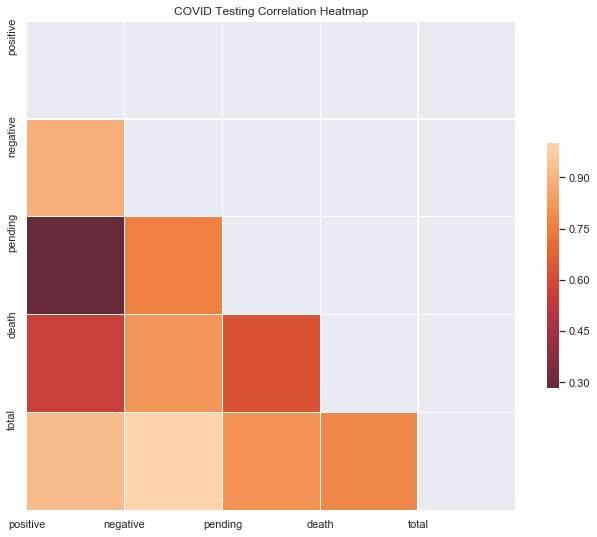

In [221]:
ticks = [i for i in range(len(corr.columns))]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(ticks, corr.columns)
plt.yticks(ticks, corr.columns)
plt.title('COVID Testing Correlation Heatmap')
plt.show()
hide_toggle()

---

# States daily data

In [273]:
response = requests.get('https://covidtracking.com/api/states/daily')
response_json = response.json() 
daily_data = pd.DataFrame.from_dict(response_json)

# daily_data[daily_data['date'] == int(datetime.datetime.today().strftime('%Y%m%d'))]

In [275]:
daily_data['datetime'] = daily_data.date.astype(str).apply(lambda x: datetime.strptime(x,'%Y%m%d'))

NY = daily_data[daily_data['state']== "NY"]

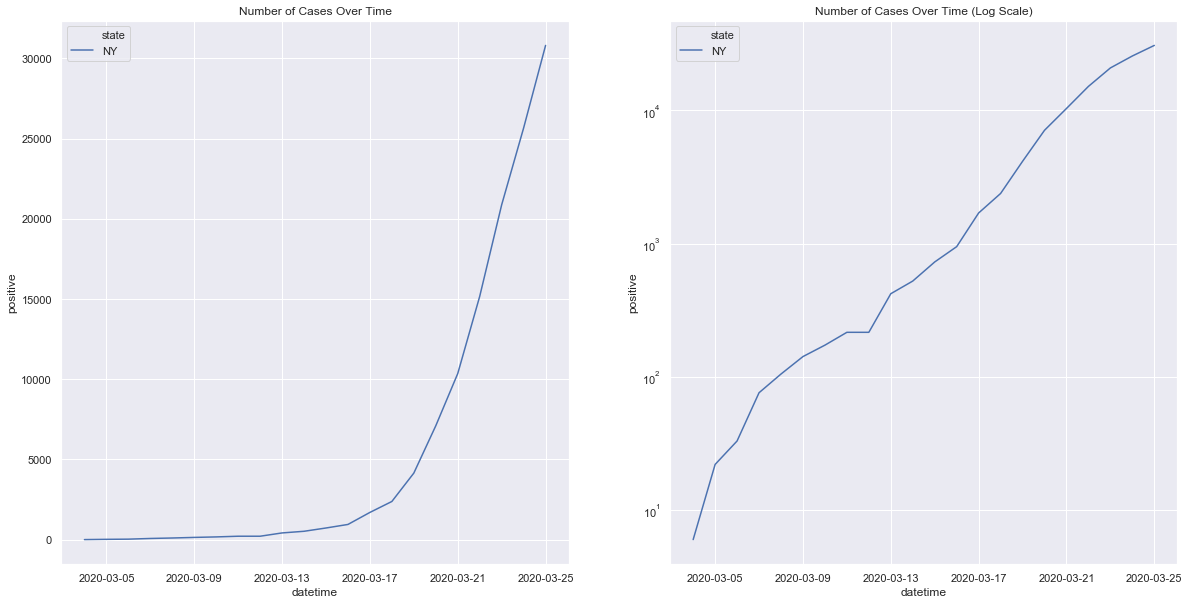

In [277]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

axes[0] =sns.lineplot(x = 'datetime', y = 'positive', hue = 'state', data = NY, ax = axes[0])
axes[0].set_title("Number of Cases Over Time")
axes[1] =sns.lineplot(x = 'datetime', y = 'positive', hue = 'state', data = NY, ax = axes[1])
axes[1].set_title("Number of Cases Over Time (Log Scale)")
axes[1] = axes[1].set(yscale="log")


In [169]:
response = requests.get('https://covidtracking.com/api/states/daily')
response_json = response.json() 
daily_data = pd.DataFrame.from_dict(response_json)

daily_data.dateChecked= daily_data.dateChecked.astype(str).apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ'))
daily_data['datetime'] = daily_data.date.astype(str).apply(lambda x: datetime.strptime(x,'%Y%m%d'))
daily_data.date = daily_data.date.astype(str).apply(lambda x: x.replace('2020',''))

daily_data['pos_diff'] = daily_data.groupby('state').positive.diff()*-1


In [170]:
daily_data['scaled_positives'] = daily_data['positive']/daily_data['total']
daily_data

,date,state,positive,negative,pending,death,total,dateChecked,datetime,pos_diff,scaled_positives
0,0320,AK,12,686.0,NaN,NaN,698,2020-03-20 20:00:00,2020-03-20,NaN,0.017192
1,0320,AL,81,28.0,NaN,0.0,109,2020-03-20 20:00:00,2020-03-20,NaN,0.743119
2,0320,AR,96,351.0,203.0,NaN,650,2020-03-20 20:00:00,2020-03-20,NaN,0.147692
3,0320,AS,0,NaN,NaN,0.0,0,2020-03-20 20:00:00,2020-03-20,NaN,NaN
4,0320,AZ,65,211.0,101.0,0.0,377,2020-03-20 20:00:00,2020-03-20,NaN,0.172414
5,0320,CA,1063,10424.0,NaN,20.0,11487,2020-03-20 20:00:00,2020-03-20,NaN,0.092539
6,0320,CO,277,2675.0,NaN,3.0,2952,2020-03-20 20:00:00,2020-03-20,NaN,0.093835
7,0320,CT,194,604.0,NaN,3.0,798,2020-03-20 20:00:00,2020-03-20,NaN,0.243108
8,0320,DC,71,501.0,1.0,1.0,573,2020-03-20 20:00:00,2020-03-20,NaN,0.123909
9,0320,DE,38,36.0,NaN,0.0,74,2020-03-20 20:00:00,2020-03-20,NaN,0.513514


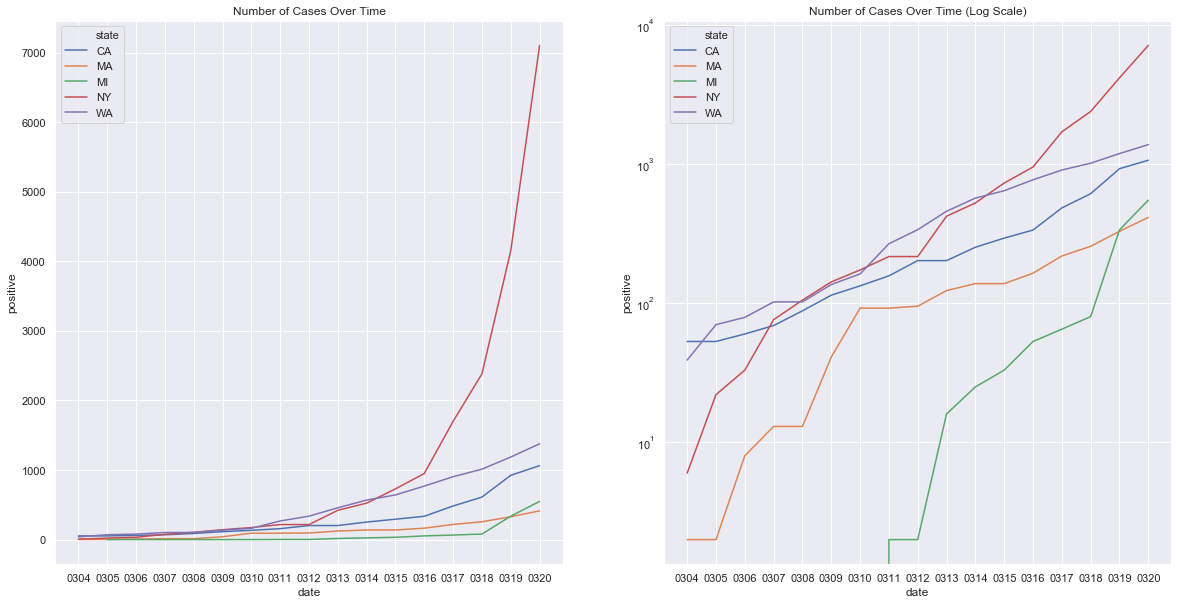

In [223]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

axes[0] =sns.lineplot(x = 'date', y = 'positive', hue = 'state', data = daily_data[daily_data['state'].isin(['NY','MA','MI','CA','WA'])], ax = axes[0])
axes[0].set_title("Number of Cases Over Time")
axes[1] =sns.lineplot(x = 'date', y = 'positive', hue = 'state', data = daily_data[daily_data['state'].isin(['NY','MA','MI','CA','WA'])], ax = axes[1])
axes[1].set_title("Number of Cases Over Time (Log Scale)")
axes[1] = axes[1].set(yscale="log")


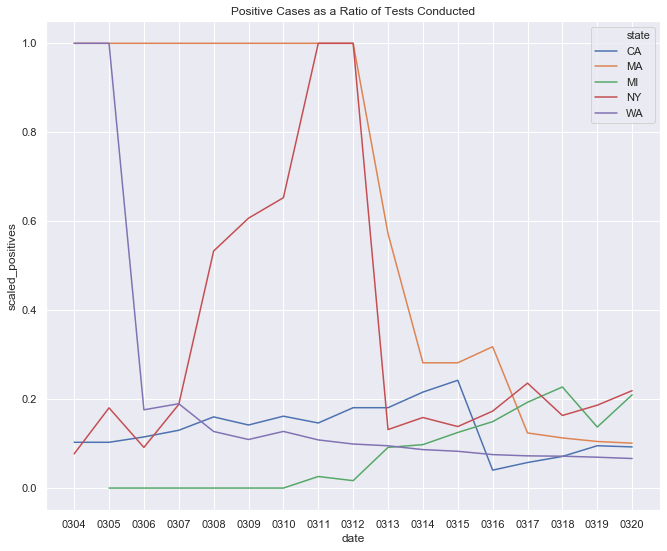

In [222]:
f, ax = plt.subplots(figsize=(11, 9))
ax =sns.lineplot(x = 'date', y = 'scaled_positives', hue = 'state', data = daily_data[daily_data.state.isin(['NY','MA','MI','CA','WA'])], ax = ax)
ax = ax.set_title("Positive Cases as a Ratio of Tests Conducted")

I don't trust these states states reporting— they're only reporting the positives 

In [175]:
onlypos = daily_data[daily_data['scaled_positives']==1]
untrustworthy_states = list(onlypos.state.value_counts().index)
untrustworthy_states.remove('NY')
untrustworthy_states.remove('WA')

subset = daily_data[~daily_data['state'].isin(untrustworthy_states)]
untrustworthy_states

['GA',
 'TX',
 'HI',
 'MA',
 'NC',
 'TN',
 'PA',
 'VI',
 'UT',
 'WY',
 'IN',
 'MO',
 'NJ',
 'RI',
 'OK']